In [1]:
from kcoloring_instances import *
from embedding_utils import *
from utils import *

In [2]:
from dwave.system import DWaveCliqueSampler
sampler = DWaveCliqueSampler(solver={"name": "Advantage_system4.1"})
larget_clique_size_pegasus = sampler.largest_clique_size

In [8]:
from statistics import mean, variance, median
avgs = []
medians = []
max_lengths = []
variances = []

for i in range(5, 178):
    print(i)
    embedding = get_clique_embedding(i)
    chain_lengths = []
    for chain in embedding.values():
        chain_lengths.append(len(chain))
    max_lengths.append(max(chain_lengths))
    avgs.append(mean(chain_lengths))
    medians.append(median(chain_lengths))
    variances.append(variance(chain_lengths))

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177


In [9]:
count_nodes = []
for i in range(5, 178):
    count_nodes.append(i)

<AxesSubplot:>

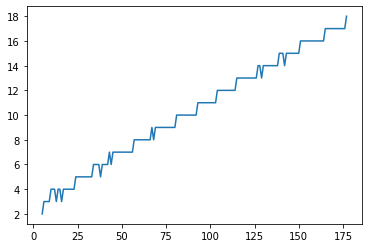

In [10]:
import seaborn as sns
sns.lineplot(x=count_nodes, y=max_lengths)

<AxesSubplot:>

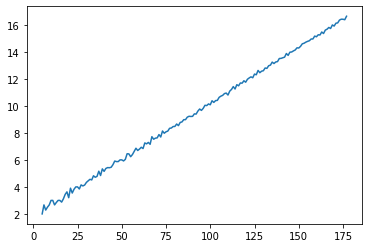

In [11]:
sns.lineplot(x=count_nodes, y=avgs)

<AxesSubplot:>

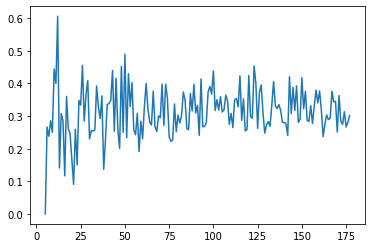

In [13]:
sns.lineplot(x=count_nodes, y=variances)

In [14]:
data_dict = {
    "nodes": count_nodes,
    "avgs": avgs,
    "max_lengths": max_lengths,
    "medians": medians,
    "variances": variances
}

In [15]:
import pandas as pd
df = pd.DataFrame(data_dict)
df

,nodes,avgs,max_lengths,medians,variances
0,5,2.000000,2,2.0,0.000000
1,6,2.666667,3,3.0,0.266667
2,7,2.285714,3,2.0,0.238095
3,8,2.500000,3,2.5,0.285714
4,9,2.666667,3,3.0,0.250000
...,...,...,...,...,...
168,173,16.346821,17,16.0,0.274365
169,174,16.413793,17,16.0,0.313335
170,175,16.411429,17,16.0,0.266535
171,176,16.375000,17,16.0,0.281429


In [16]:
df.to_csv("./clique_embedding_statistics.csv")

<AxesSubplot:>

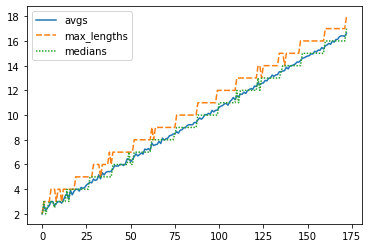

In [23]:
sns.lineplot(data=df[["avgs", "max_lengths", "medians"]], palette="tab10", linewidth=1.5)

In [1]:
count_nodes

NameError: name 'count_nodes' is not defined

In [5]:
from utils import load_cnf, cnf_to_bqm
from embedding_utils import *
import seaborn as sns
from redundancy import *
from utils import *
from dwave.embedding.chain_strength import scaled
import pandas as pd
from brute_force import get_bqm_random_sat
import numpy as np
import matplotlib.pyplot as plt
seed = 1
qpu = get_qpu().to_networkx_graph()

In [3]:
vars_to_clauses = {
        10: [10, 15, 20, 25],
        15: [15, 20, 25, 30, 35, 40, 45],
        20: [30, 35]
    }

In [8]:
from statistics import variance
var_clause_rels = []
max_chain_lengths = []
num_qubits = []
variances = []
num_variables = []
num_clauses = []
for nvars, nclauses_arr in vars_to_clauses.items():
    for nclauses in nclauses_arr:
        bqm, clauses = get_bqm_random_sat(nvars, nclauses, seed)
        embedding = get_clique_embedding(bqm, qpu, seed_=1)
        num_variables.append(nvars)
        num_clauses.append(nclauses)
        var_clause_rels.append(round(nvars/nclauses,2))
        chain_lengths, _ = get_chain_lengths(bqm, embedding)
        max_chain_lengths.append(max(chain_lengths))
        num_qubits.append(sum(chain_lengths))
        variances.append(variance(chain_lengths))
        
        
df = pd.DataFrame({
    "num_variables": num_variables,
    "num_clauses": num_clauses,
    "var_clause_rel":var_clause_rels,
    "max_chain_length": max_chain_lengths,
    "num_qubits": num_qubits,
    "variance": variances
})

df
        

best embedding max_chain_length 3
best embedding qubits used 60
best embedding variance: 0
best embedding max_chain_length 4
best embedding qubits used 94
best embedding variance: 0.19
best embedding max_chain_length 4
best embedding qubits used 114
best embedding variance: 0.16551724137931034
best embedding max_chain_length 5
best embedding qubits used 168
best embedding variance: 0.16470588235294117
best embedding max_chain_length 4
best embedding qubits used 114
best embedding variance: 0.16551724137931034
best embedding max_chain_length 5
best embedding qubits used 168
best embedding variance: 0.16470588235294117
best embedding max_chain_length 5
best embedding qubits used 192
best embedding variance: 0.1641025641025641
best embedding max_chain_length 6
best embedding qubits used 260
best embedding variance: 0.17676767676767677
best embedding max_chain_length 6
best embedding qubits used 290
best embedding variance: 0.16326530612244897
best embedding max_chain_length 7
best embeddi

,num_variables,num_clauses,var_clause_rel,max_chain_length,num_qubits,variance
0,10,10,1.00,3,60,0.000000
1,10,15,0.67,4,94,0.190000
2,10,20,0.50,4,114,0.165517
3,10,25,0.40,5,168,0.164706
4,15,15,1.00,4,114,0.165517
5,15,20,0.75,5,168,0.164706
6,15,25,0.60,5,192,0.164103
7,15,30,0.50,6,260,0.176768
8,15,35,0.43,6,290,0.163265
9,15,40,0.38,7,375,0.151515


In [9]:
df.to_csv("./clique_rnd_cnfs_embeddings.csv")